## Distribuição Discreta de Probabilidade

## Propriedades da Esperança Matetática ou Valor Esperado ou Média
### E(cX) = c.E(X), para c constante
### E(X+Y) = E(X) + E(Y)
### E(X1 + X2 + Xn) = E(X1) + E(X2) + E(Xn)

## Propriedades da Variância
### Var(X+c) = Var(X), para c constante
### Var(cX) = c**2 . Var(X)
## Var(X+Y) = Var(X) + Var(Y)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def Total_col(df):
    l_index= list(range(df.shape[0]))
    l_index.append('total')
    df = df.append(df.sum(),ignore_index=True)
    df['index']= l_index
    df.set_index('index',inplace=True)
    return df

In [3]:
def Total_col2(df,s_index, l_index):
    df = df.append(df.sum(), ignore_index=True)
    df[s_index]= l_index
    df.set_index(s_index, inplace=True)
    return df

In [4]:
i= [0,1,2,3,4,5,6,7]
d = {'y':[16,19,15,21,9,10,8,2]}
it= i[:]
it.append('total')
dfi = pd.DataFrame(data=d)
dft= Total_col(dfi.copy())
dft['x']= it
dft.set_index('x', inplace=True)
dft.transpose()

x,0,1,2,3,4,5,6,7,total
y,16,19,15,21,9,10,8,2,100


In [5]:
dfp= dfi.div(dfi.sum().astype(float),axis=1) 
dfp['x']= i
dfp.rename(columns={'y':'P'}, inplace=True)
dfpt= Total_col(dfp)
dfpt['x']=it
dfpt.rename(columns={'y':'P(x)'}, inplace=True)
dfpt.set_index('x',inplace=True)
dfpt.transpose()

x,0,1,2,3,4,5,6,7,total
P,0.16,0.19,0.15,0.21,0.09,0.1,0.08,0.02,1.0


In [6]:
dfp['P'].values

array([0.16, 0.19, 0.15, 0.21, 0.09, 0.1 , 0.08, 0.02])

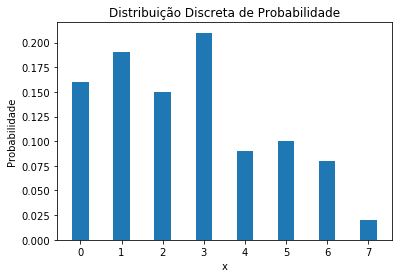

In [7]:
l_x= i
p_x= dfp['P'].values
plt.xlabel('x')
plt.ylabel('Probabilidade')
plt.title('Distribuição Discreta de Probabilidade')
plt.bar(l_x,p_x, width=0.4)
plt.show()

In [7]:
df= dfp.copy()
df['xP'] = df['x'] * df['P']
Ex = df['xP'].sum()
df['Var_x']= ((df['x']-Ex)**2) * df['P']
df.set_index('x', inplace=True)
Total_col(df.copy()).transpose()
#dft.transpose()

index,0,1,2,3,4,5,6,7,total
P,0.1600,0.1900,0.150,0.2100,0.0900,0.100,0.0800,0.0200,1.00
xP,0.0000,0.1900,0.300,0.6300,0.3600,0.500,0.4800,0.1400,2.60
Var_x,1.0816,0.4864,0.054,0.0336,0.1764,0.576,0.9248,0.3872,3.72


In [8]:
# Probabilidade conjuta: index1 a index2
index1= 0
index2= 2
dfp.iloc[index1:index2+1,0].sum()

0.5

In [9]:
Var_x = df['Var_x'].sum()
std_x = Var_x ** 0.5
ds = {'E(x)':[Ex], 
    'Var(x)':[Var_x],
     'std(x)':[std_x]}
dfs = pd.DataFrame(data=ds)
dfs

,E(x),Var(x),std(x)
0,2.6,3.72,1.92873
